In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [204]:
df =pd.read_csv("UniversalBank.csv")

In [205]:
df.head(9)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0


In [206]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [207]:
#no null values

In [208]:
#Now deleting the columns which are not required

In [209]:
del df['ID']
del df["ZIP Code"]
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [210]:
df.groupby('CreditCard').CreditCard.count()

CreditCard
0    3530
1    1470
Name: CreditCard, dtype: int64

In [211]:
#It is an imbalanced dataset will see if accuracy decreases.

In [212]:
df.rename(columns={"Personal Loan": "Personal_Loan","Securities Account":"Sec_Acc","CD Account":"CD_Acc"},inplace=True)
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Sec_Acc,CD_Acc,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [213]:
df['Personal_Loan'].value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

In [214]:
#it is also imbalanced we have to balance the dataset

# EDA

In [215]:
#Reordering Columns

In [216]:
# df=df[['Age','Experience','Income',"Family","CCAvg","Education","Mortgage","Sec_Acc","CD_Acc","Online","CreditCard","Personal_Loan"]]

In [217]:
df.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Sec_Acc,CD_Acc,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [218]:
df.dtypes

Age                int64
Experience         int64
Income             int64
Family             int64
CCAvg            float64
Education          int64
Mortgage           int64
Personal_Loan      int64
Sec_Acc            int64
CD_Acc             int64
Online             int64
CreditCard         int64
dtype: object

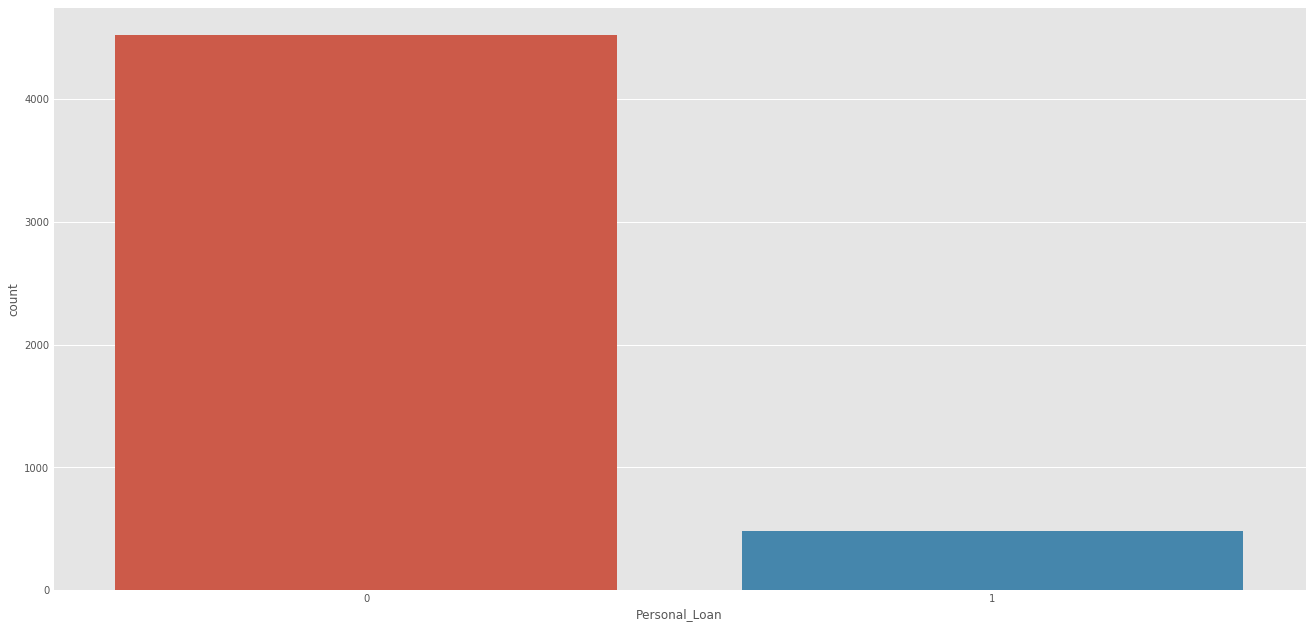

In [219]:
sns.countplot(data=df,x="Personal_Loan")

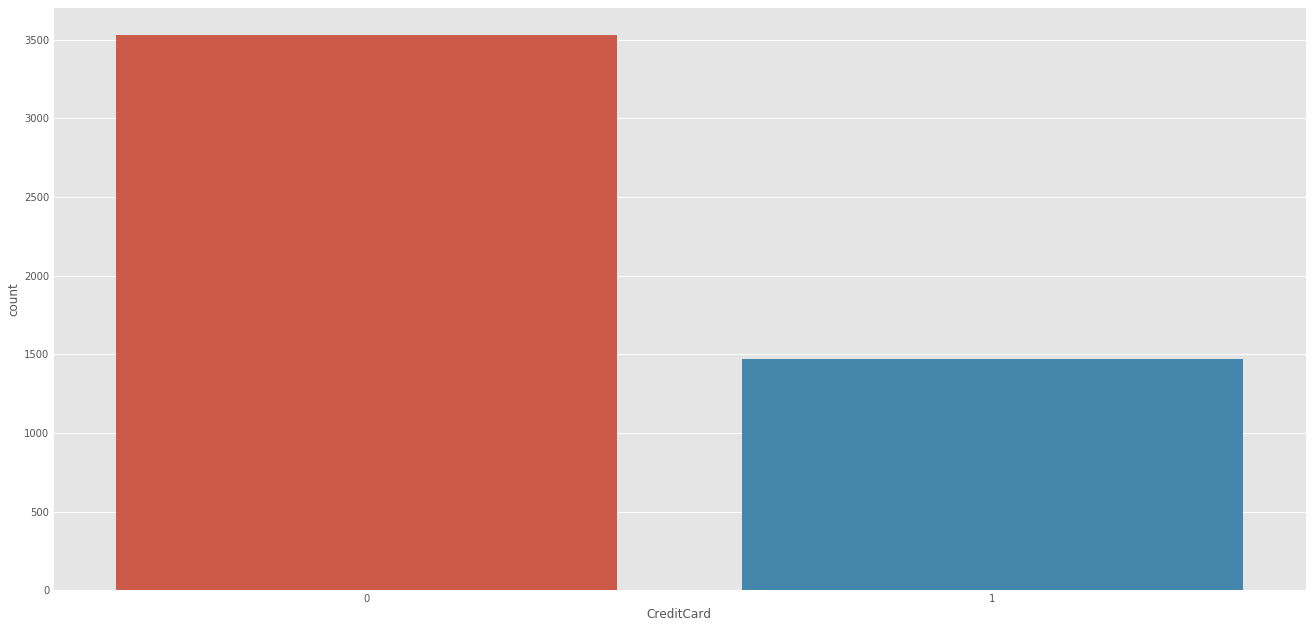

In [220]:
sns.countplot(data=df,x="CreditCard")

In [221]:
df.tail()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Sec_Acc,CD_Acc,Online,CreditCard
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0
4999,28,4,83,3,0.8,1,0,0,0,0,1,1


In [222]:
pip install bubbly

Note: you may need to restart the kernel to use updated packages.


In [223]:
# from bubbly.bubbly import bubbleplot

In [224]:
# figure = bubbleplot(dataset = df, x_column = 'Experience', y_column = 'Income', 
#     bubble_column = 'Personal_Loan', time_column = 'Age', size_column = 'Mortgage', color_column = 'Personal_Loan', 
#     x_title = "Experience", y_title = "Income", title = 'Experience vs Income. vs Age vs Mortgage vs Personal Loan',
#     x_logscale = False, scale_bubble = 3, height = 650)

# plt.iplot(figure, config={'scrollzoom': True})

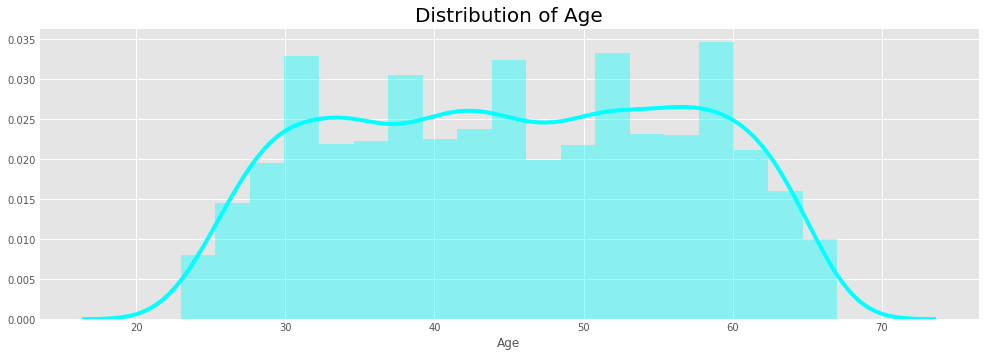

In [225]:
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(df['Age'], color = 'cyan')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

In [226]:
#Age is well managed

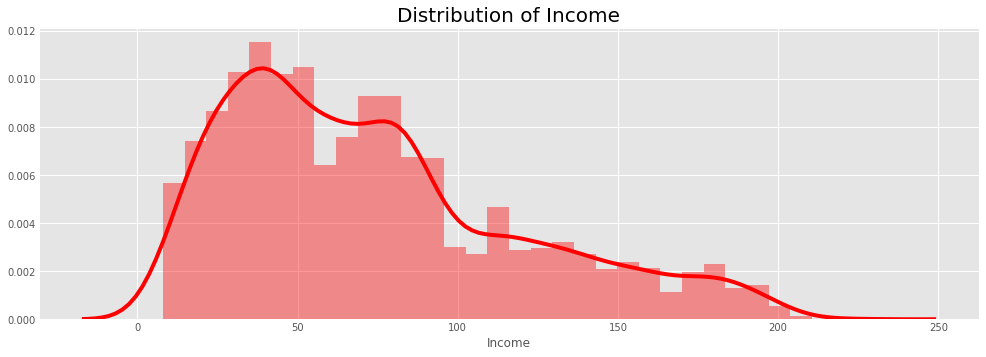

In [227]:
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(df['Income'], color = 'red',norm_hist=True)
plt.title('Distribution of Income', fontsize = 20)
plt.show()

In [228]:
#So income is not well managed.

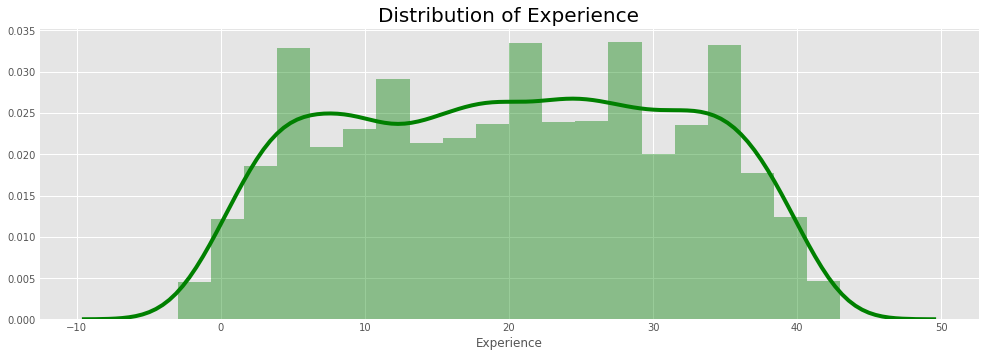

In [229]:
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(df['Experience'], color = 'green')
plt.title('Distribution of Experience', fontsize = 20)
plt.show()

In [230]:
#So Experience is welll balanced

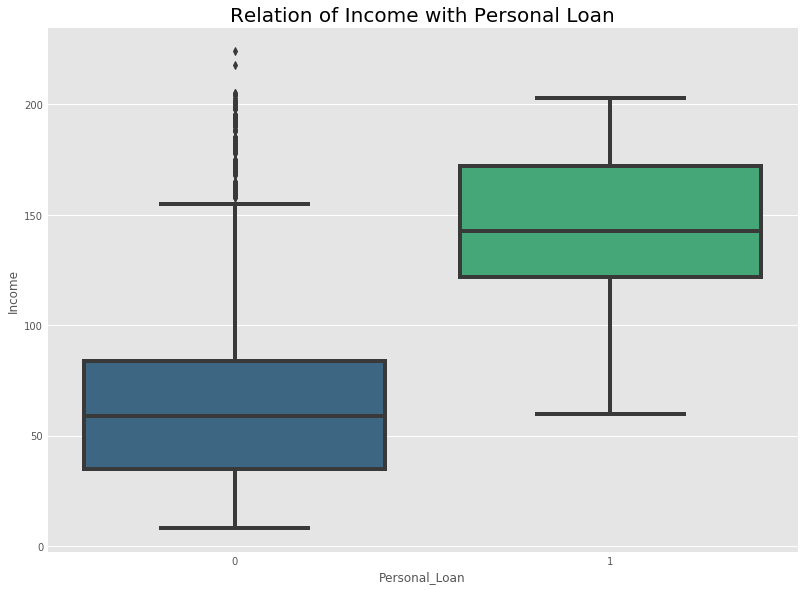

In [231]:
plt.rcParams['figure.figsize'] = (12, 9)
sns.boxplot(df['Personal_Loan'], df['Income'], palette = 'viridis')
plt.title('Relation of Income with Personal Loan', fontsize = 20)
plt.show()

# Checking For Correlation


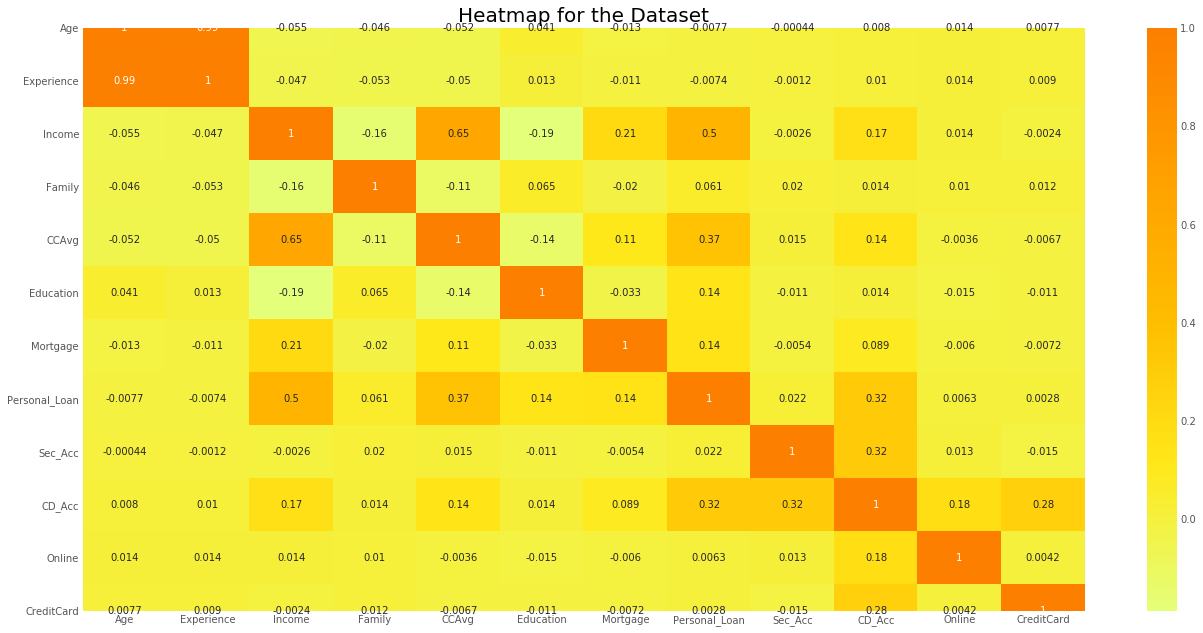

In [232]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('ggplot')
sns.heatmap(df.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

In [233]:
corr=df.corr()
corr["Personal_Loan"].sort_values(ascending=False)

Personal_Loan    1.000000
Income           0.502462
CCAvg            0.366889
CD_Acc           0.316355
Mortgage         0.142095
Education        0.136722
Family           0.061367
Sec_Acc          0.021954
Online           0.006278
CreditCard       0.002802
Experience      -0.007413
Age             -0.007726
Name: Personal_Loan, dtype: float64

In [234]:
x=df.drop('Personal_Loan',axis=1)
x

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Sec_Acc,CD_Acc,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,1,0


In [235]:
y=df['Personal_Loan']

In [236]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [237]:
print(model.feature_importances_)

[0.03933181 0.03905326 0.39558092 0.08404791 0.17837519 0.10498846
 0.04388432 0.00743546 0.07924763 0.0115418  0.01651322]


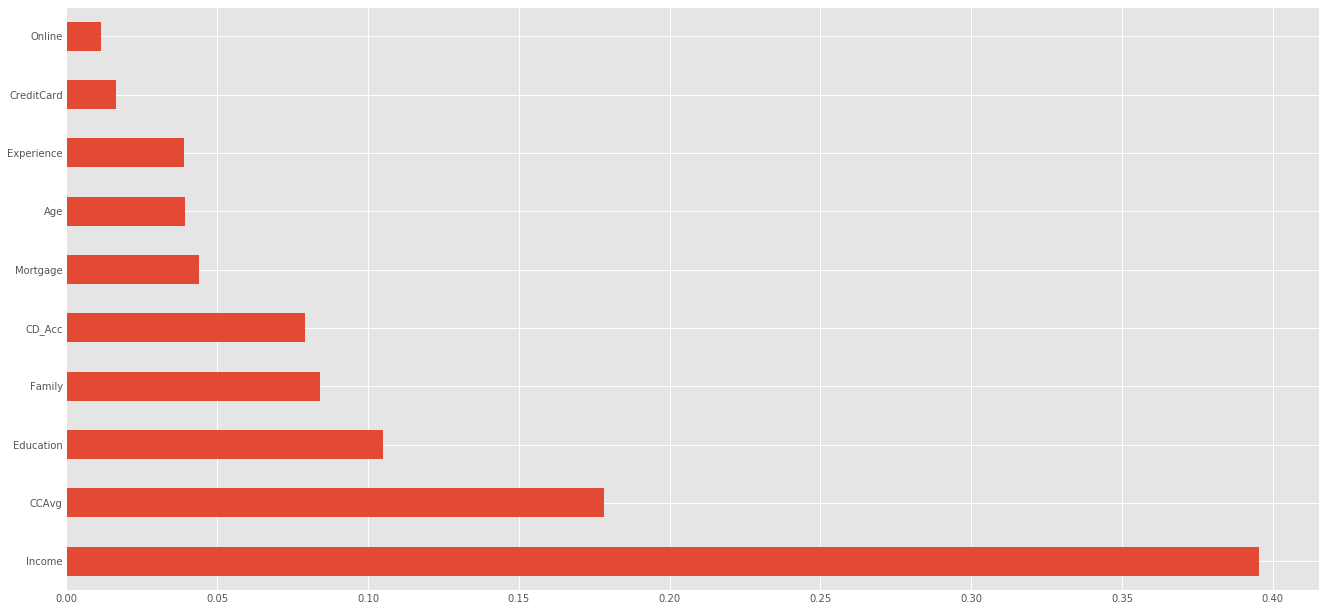

In [238]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
# Using ANOVA TEST

In [248]:
from sklearn.feature_selection import f_classif

In [250]:
select=f_classif(x,y)
select

(array([2.98324239e-01, 2.74675302e-01, 1.68800458e+03, 1.88931888e+01,
        7.77413007e+02, 9.52061943e+01, 1.02994466e+02, 2.41006236e+00,
        5.55829340e+02, 1.96983772e-01, 3.92268699e-02]),
 array([5.84959264e-001, 6.00235883e-001, 3.56029139e-318, 1.40990407e-005,
        3.83026616e-159, 2.70966319e-022, 5.73034172e-024, 1.20620879e-001,
        1.27840285e-116, 6.57185766e-001, 8.43007940e-001]))

In [254]:
p_values=pd.Series(select[1])
p_values.index=x.columns
p_values.sort_values(ascending=True,inplace=True)

In [255]:
p_values

Income        3.560291e-318
CCAvg         3.830266e-159
CD_Acc        1.278403e-116
Mortgage       5.730342e-24
Education      2.709663e-22
Family         1.409904e-05
Sec_Acc        1.206209e-01
Age            5.849593e-01
Experience     6.002359e-01
Online         6.571858e-01
CreditCard     8.430079e-01
dtype: float64

In [260]:
p_values=p_values[p_values<0.05]
p_values

Income       3.560291e-318
CCAvg        3.830266e-159
CD_Acc       1.278403e-116
Mortgage      5.730342e-24
Education     2.709663e-22
Family        1.409904e-05
dtype: float64

In [ ]:
# From all the three feature selection techniques

In [239]:
# df.drop(['Online','CreditCard','Mortgage'],axis=1,inplace=True)

In [240]:
# df.head()